In [3]:
from sentence_transformers import SentenceTransformer

In [4]:
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

In [5]:
import pandas as pd

In [6]:
keywords =["Aspiring human resources", "seeking human resources"]
keyword_embeddings = model.encode(keywords)

In [7]:
data_file_path = '../data/raw/potential-talents.csv'

In [8]:
df = pd.read_csv(data_file_path, index_col = 'id')
title_df = df['job_title']
sentences = list(set(title_df.values))

In [9]:
sentence_embeddings = model.encode(sentences)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


/Users/haroun/PycharmProjects/apziva/kwjKuoMmbwSWxYXj/venv/lib/python3.10/site-packages/threadpoolctl.py:1010: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)


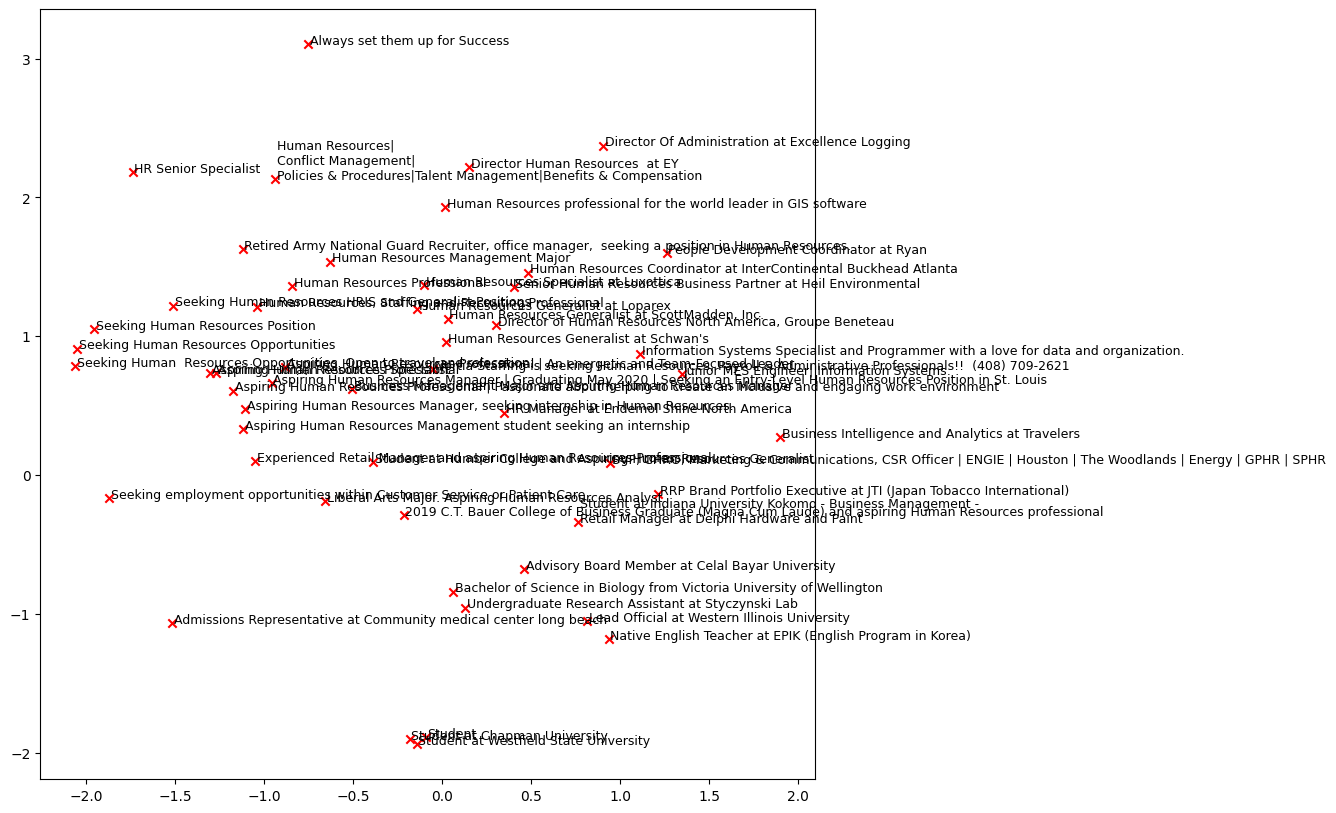

In [10]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

def plot_embeddings(embeddings, labels):
    tsne = TSNE(n_components=2, random_state=0)
    reduced_embeddings = tsne.fit_transform(embeddings)

    plt.figure(figsize=(10, 10))
    for i, label in enumerate(labels):
        x, y = reduced_embeddings[i]
        plt.scatter(x, y, marker='x', color='red')
        plt.text(x+0.01, y, label, fontsize=9)
    plt.show()

plot_embeddings(sentence_embeddings, sentences)

In [11]:
from sklearn.metrics.pairwise import cosine_similarity

for keyword, keyword_embedding in zip(keywords, keyword_embeddings):
    max_similarity = 0
    max_sentence = ""
    for sentence, sentence_embedding in zip(sentences, sentence_embeddings):
        similarity = cosine_similarity([keyword_embedding], [sentence_embedding])
        if similarity[0][0] > max_similarity:
            max_similarity = similarity[0][0]
            max_sentence = sentence
    print(f"{keyword}, {max_sentence}.\tThe similarity score is: {max_similarity:.3f}")

Aspiring human resources, Aspiring Human Resources Professional.	The similarity score is: 0.921
seeking human resources, Seeking Human Resources Opportunities.	The similarity score is: 0.938


In [12]:
similarities = cosine_similarity(keyword_embeddings, sentence_embeddings)

In [13]:
similarities

array([[0.74724174, 0.7317103 , 0.27024588, 0.35001022, 0.72224355,
        0.8701794 , 0.8650652 , 0.3004459 , 0.47582662, 0.5923617 ,
        0.9206303 , 0.56142414, 0.4144441 , 0.46289665, 0.7923906 ,
        0.45213276, 0.2947043 , 0.30736828, 0.3591615 , 0.83408856,
        0.41218704, 0.41633564, 0.7461005 , 0.51505154, 0.32735008,
        0.41198593, 0.6163168 , 0.40485275, 0.31740287, 0.71498704,
        0.74086505, 0.4070392 , 0.65933084, 0.74201405, 0.65793395,
        0.20644704, 0.43425226, 0.2399981 , 0.3626714 , 0.6036315 ,
        0.55841064, 0.58230865, 0.40377778, 0.7273451 , 0.6178709 ,
        0.2631367 , 0.47940361, 0.2766942 , 0.5199114 , 0.5462669 ,
        0.21101928, 0.3761557 ],
       [0.6576607 , 0.62640095, 0.20792899, 0.29952693, 0.5900315 ,
        0.7440102 , 0.93761116, 0.18610592, 0.505257  , 0.6433791 ,
        0.7580807 , 0.40740037, 0.28139612, 0.4220189 , 0.6150148 ,
        0.4820794 , 0.20824346, 0.22003578, 0.22348917, 0.912858  ,
        0.42739

In [14]:
top_10_similar_sentences = []

for i, sentence in enumerate(keywords):
    # Getting the indices of top 10 similar sentences
    top_10_indices = similarities[i].argsort()[-10:][::-1] 
    
    top_10_for_sentence = [(sentences[j], similarities[i][j]) for j in top_10_indices]
    top_10_similar_sentences.append((sentence, top_10_for_sentence))

# Printing the results
for s1, top_10 in top_10_similar_sentences:
    print(f"Most similar sentences to '{s1}':")
    for s2, sim in top_10:
        print(f"   '{s2}' with a similarity of {sim:.4f}.")
    print("---------")

Most similar sentences to 'Aspiring human resources':
   'Aspiring Human Resources Professional' with a similarity of 0.9206.
   'Aspiring Human Resources Specialist' with a similarity of 0.8702.
   'Seeking Human Resources Opportunities' with a similarity of 0.8651.
   'Seeking Human Resources Position' with a similarity of 0.8341.
   'Aspiring Human Resources Professional | An energetic and Team-Focused Leader' with a similarity of 0.7924.
   'Aspiring Human Resources Manager, seeking internship in Human Resources.' with a similarity of 0.7472.
   'Human Resources Professional' with a similarity of 0.7461.
   'Seeking Human Resources HRIS and Generalist Positions' with a similarity of 0.7420.
   'Aspiring Human Resources Manager | Graduating May 2020 | Seeking an Entry-Level Human Resources Position in St. Louis' with a similarity of 0.7409.
   'Aspiring Human Resources Professional | Passionate about helping to create an inclusive and engaging work environment' with a similarity of 

ModuleNotFoundError: No module named 'matplotlib'